In [4]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from FBRN.myfunc import Physics

In [5]:
preds = np.load('../test_dir/test_gpu_out/results/test_gpu_predictions.npy', allow_pickle=True)
x_true = np.load('../test_dir/test_gpu_out/results/test_gpu_ground_true.npy', allow_pickle=True)


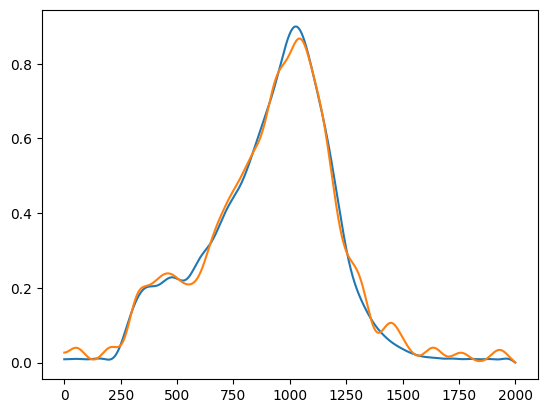

In [11]:
index = 148

plt.plot(x_true[index,0,:])
plt.plot(preds[index,0,:])

plt.show()

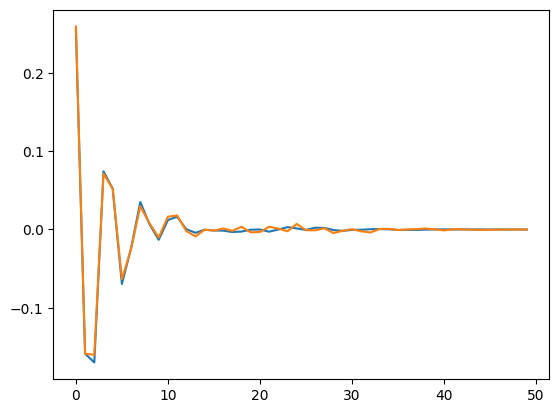

In [12]:
physics = Physics(2000,50,1,1)

x_true_eig = physics.BasisChange(x_true)
x_pred_eig = physics.BasisChange(preds)
plt.plot(x_true_eig[index,0,:])
plt.plot(x_pred_eig[index,0,:])

plt.show()

# Error distribution

In [8]:
index = 3
error = np.zeros(x_true.shape[0])
error_eig = np.zeros(x_true.shape[0])
error_avg = 0
error_eig_avg = 0
for index in range(x_true.shape[0]):
    error[index] = sum((x_true[index,0,:]-preds[index,0,:])**2) / sum(x_true[index,0,:]**2) 
    error_avg += error[index] / x_true.shape[0]

    error_eig[index] = sum((x_true_eig[index,0,:]-x_pred_eig[index,0,:])**2) / sum(x_true_eig[index,0,:]**2) 
    error_eig_avg += error_eig[index] / x_true.shape[0]


print('Average error in continuous space:', error_avg)
print('Average error in the eigen space: ', error_eig_avg)

Average error in continuous space: 0.014138904717110306
Average error in the eigen space:  0.014137505152933067


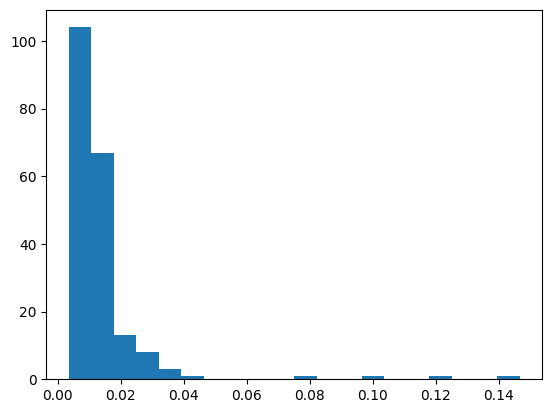

In [9]:
plt.hist(error,bins=20)
plt.show()

In [10]:
np.argmin(error)

148